In [234]:
import numpy as np
import random

# Define States
states = []
for i in range(3):
    for j in range(4):
        states.append((i+1, j+1))

### Define Rewards
rewards = {}
for state in states:
    # Green Terminal State
    if state == (1,4):
        rewards[state] = 1
    # Red Terminal State
    elif state == (2, 4):
        rewards[state] = -1
    # For all other States
    else:
        rewards[state] = 0
    
### Define Actions
# U = Up, D = Down, L = Left, R = Right
actions = {             
    (1, 1): ["D", "R"],
    (1, 2): ["L", "R"],
    (1, 3): ["L", "R", "D"],
    (2, 1): ["U", "D"],             
    (2, 2): ["U", "D", "L", "R"],
    (2, 3): ["U", "R", "D"],
    (3, 1): ["U", "R"],
    (3, 2): ["L", "R"],
    (3, 3): ["L", "U", "R"],
    (3, 4): ["U", "L"]
}

### Define initial Policy, here: Random
policy = {}
for state in actions.keys():
    policy[state] = np.random.choice(actions[state])

### Define Transition Probabilites
p_action = {"U": 0.3, "D": 0.1, "L": 0.1, "R": 0.5}

### Value Iteration Presetting ###
# 0th Step: Set Hyperparams
GAMMA = 0.9
THETA = 0.005
# Set EPSILON = 0, if Agent should act deterministic
EPSILON = 0.1           

# 1st Step: Initialize all V(s) arbitrary
V = {}
for s in states:
    if s == (1, 4):
        V[s] = 1
    elif s == (2, 4):
        V[s] = -1
    else:
        V[s] = 0

# For Plotting
delta_records = []

# Function that returns the next state, given current state and action
def  getNextState(a: str, s: tuple) -> tuple:
    if a == "U":
        next_state = (s[0] - 1, s[1])
        if next_state == (2, 2):
            next_state = (s[0], s[1])

    if a == "D":
        next_state = (s[0] + 1, s[1])
        if next_state == (2, 2):
            next_state = (s[0], s[1])    

    if a == "L":
        next_state = (s[0], s[1] - 1)
        if next_state == (2, 2):
            next_state = (s[0], s[1])

    if a == "R":
        next_state = (s[0], s[1] + 1)
        if next_state == (2, 2):
            next_state = (s[0], s[1])
    
    return next_state
    

# Value Iteration
numb_of_iteration = 0
while True:
    delta = 0
    for s in states:
        if s in policy:
            v_init = V[s]
            v_post = 0

            for a in actions[s]:
                # Get Random Action (only relevant if EPSILON != 0)
                a_rand = np.random.choice([action for action in actions[s] if action != a])

                # If action is Up
                if a == "U":
                    next_state = getNextState(a, s)
                    v = (1-EPSILON) * (p_action["U"] * (rewards[next_state] + GAMMA*V[next_state])) +  (EPSILON) * (rewards[getNextState(a_rand, s)] + GAMMA*V[getNextState (a_rand, s)])


                # If action is Down
                if a == "D":
                    next_state = getNextState(a, s)
                    v = (1-EPSILON) * (p_action["D"] * (rewards[next_state] + GAMMA*V[next_state])) +  (EPSILON) * (rewards[getNextState(a_rand, s)] + GAMMA*V[getNextState (a_rand, s)])
 
                # If action is Left
                if a == "L":
                    next_state = getNextState(a, s)
                    v = (1-EPSILON) * (p_action["L"] * (rewards[next_state] + GAMMA*V[next_state])) +  (EPSILON) * (rewards[getNextState(a_rand, s)] + GAMMA*V[getNextState (a_rand, s)])

                # If action is Right
                if a == "R":
                    next_state = getNextState(a, s)
                    v = (1-EPSILON) * (p_action["R"] * (rewards[next_state] + GAMMA*V[next_state])) +  (EPSILON) * (rewards[getNextState(a_rand, s)] + GAMMA*V[getNextState (a_rand, s)])
                                    
                # If new value of v(s) is better than the old value, i.e. v_init, then keep it
                if v > v_post:
                    v_post = v
                    policy[s] = a
                
                # Print information about the variables
                # print("s: {}, s': {}, a: {}, v: {}, v[s]: {}, V[s']: {}".format(s, next_state, a, v, V[s], V[next_state]))
                
            # Safe highest state value v_post in V dictionary
            V[s] = v_post
            # Calculate delta, i.e. difference between the old value and the new value
            delta = max(delta, np.abs(v_init - V[s]))

    delta_records.append(delta)                                 # Optional (for plotting)
    if delta < THETA:
        break
    numb_of_iteration += 1


#########################

print("Number of Iteration: {}".format(numb_of_iteration))
print(policy)
print(V)



Number of Iteration: 18
{(1, 1): 'R', (1, 2): 'R', (1, 3): 'R', (2, 1): 'U', (2, 2): 'R', (2, 3): 'U', (3, 1): 'R', (3, 2): 'R', (3, 3): 'U', (3, 4): 'U'}
{(1, 1): 0.15487061351779632, (1, 2): 0.37383982603004046, (1, 3): 0.8886455843427036, (1, 4): 1, (2, 1): 0.03875838489336864, (2, 2): 0.12305649212089062, (2, 3): 0.2209541136376952, (2, 4): -1, (3, 1): 0.012740635760209673, (3, 2): 0.023706222109300894, (3, 3): 0.05582540960379701, (3, 4): 0}


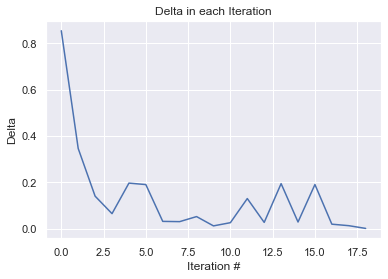

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(delta_records)
plt.xlabel("Iteration #")
plt.ylabel("Delta")
plt.title("Delta in each Iteration")
plt.show()

# print(delta_records)